<a href="https://colab.research.google.com/github/VTheStone/Aprendizado_de_Maquinas/blob/main/Victor_R_Grecco_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [69]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [3]:
# Controle de versão

seed = 1701
np.random.seed(seed)

In [4]:
# Configuração das figuras

%matplotlib inline 

mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Ignorar warnings desnecessários (ver SciPy issue #5998)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## **Load Data**

In [6]:
from sklearn.datasets import load_boston

In [7]:
prep_array = load_boston()

In [8]:
prep_df = pd.DataFrame(prep_array['data'], columns = prep_array['feature_names'])
prep_df['target'] = prep_array['target']

# **1 - Descrição do conjunto de dados**

**The Boston Housing Dataset**

Dataset de origem natural, com 506 observações, que estão desordenadas.

Possui 14 variáveis:

**CRIM** - Taxa de criminalidade per capita por cidade;

**ZN** - Proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados;

**INDUS** - Proporção de acres de negócios não varejistas por cidade;

**CHAS** - Charles River (variável dummy - 1: Se área é limitada por rio, 0: se não);

**NOX** - Concentração de óxidos nítricos (partes por 10 milhões);

**RM** - Número médio de quartos por habitação;

**AGE** - Proporção de unidades ocupacionais construidas antes de 1940;

**DIS** - Distância ponderada com relação a 5 centros de empregos em Boston;

**RAD** - Índice de acessibilidade às rodovidas radiais;

**TAX** - Taxa de impostos de propriedades de valor total por 10.000;

**PTRATIO** - proporção de aluno-professor por cidade;

**B** - 1000 * (Bk - 0.63)^2, onde Bk = Proporção de negros por cidade;

**LSTAT** - Porcentagem de status inferior da população;

**MEDV *(target)*** - Valor mediano de casas ocupadas por proprietários em 1.000;

  Neste caso o objetivo é predizer o valor da variável MEDV, que é a variável *target* (Alvo) do banco de dados. Para isso é importante entender cada variável superficialmente e como elas se relacionam.

In [9]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- Nenhuma observação possui valores faltantes;
- São todas do tipo *float64*

In [10]:
prep_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- Observasse que as cinco primeiras observações possuem a variável CHAS com valor 0, representando que não é uma área limitada por rio, vale observar a porcentagem de observações desse tipo 

In [11]:
prep_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

- Como imaginado há uma grande maioria de áreas do tipo 0, em relação a apenas 35 observações do tipo 1, dizendo que esse tipo de área é mais incomum.

In [12]:
prep_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


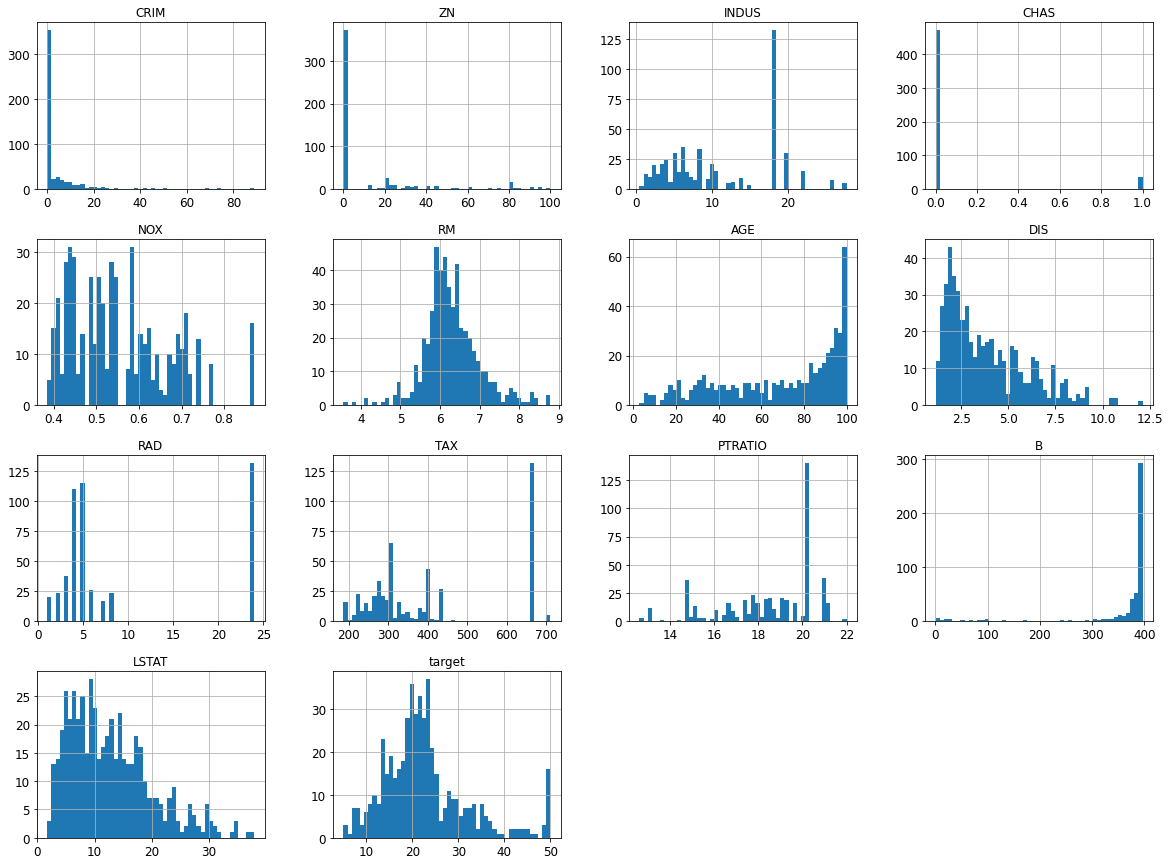

In [13]:
prep_df.hist(bins  = 50, figsize = (20, 15))
plt.show()

- Como comentado em nota no [site](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) a variável 14 (MEDV), que é o alvo, possui uma grande quantidade de observações com valor 50, o que indicaria que há um agrupamento nos casos com valor maior de 50.

# **2 - Separação do conjunto em treino e teste**

- Como visto no caso do *California Housing* para realizar uma separação mais adequada precisamos estratificar a variável alvo, considerando a importância de possuir um número mínimo de observações para cada categoria, tanto no conjunto de treino como no de testes.
- Nesse caso será uma estratificação de 10 em 10 com 5 estratos.



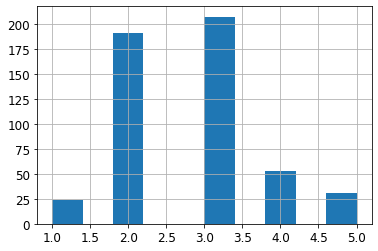

In [14]:
prep_df['target_cat'] = pd.cut(prep_df['target'], bins = [0., 10., 20., 30., 40., np.inf], labels = [1, 2, 3, 4, 5]) 

prep_df['target_cat'].hist()

In [15]:
prep_df['target_cat'].value_counts()

3    207
2    191
4     53
5     31
1     24
Name: target_cat, dtype: int64

- Realizando a amostragem estratificada com base na nova variável criada, assim como no exemplo do *California Housing*

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_index, test_index in split.split(prep_df, prep_df['target_cat']):
    strat_train_set = prep_df.loc[train_index]
    strat_test_set = prep_df.loc[test_index]

- Testando se a separação está com as categorias bem representadas nos dois conjuntos

In [17]:
strat_test_set['target_cat'].value_counts() / len(strat_test_set)

3    0.411765
2    0.372549
4    0.107843
5    0.058824
1    0.049020
Name: target_cat, dtype: float64

In [18]:
prep_df['target_cat'].value_counts() / len(prep_df)

3    0.409091
2    0.377470
4    0.104743
5    0.061265
1    0.047431
Name: target_cat, dtype: float64

- Remover variável *target_cat*, já que é redundante com *target* e foi criada apenas para realizar a separação do conjunto de treino e teste.

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("target_cat", axis=1, inplace=True)

# **3 - Visualização do conjunto de dados**

- Realizar uma análise exploratória dos dados, visualizando apenas o conjunto de treinos.

In [20]:
vis_df = strat_train_set.copy()

- Visualizar correlações

In [21]:
corr_matrix = vis_df.corr()

corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.211783,0.416506,-0.055972,0.440890,-0.257658,0.368513,-0.384154,0.639033,0.594542,0.294674,-0.433506,0.484501,-0.397069
ZN,-0.211783,1.000000,-0.551066,-0.035605,-0.527401,0.309390,-0.586264,0.683803,-0.326117,-0.332589,-0.380586,0.179447,-0.417218,0.351327
INDUS,0.416506,-0.551066,1.000000,0.058169,0.763099,-0.392814,0.653243,-0.712990,0.598210,0.737439,0.408599,-0.351307,0.590205,-0.479156
CHAS,-0.055972,-0.035605,0.058169,1.000000,0.090511,0.095891,0.095677,-0.101130,0.007521,-0.031770,-0.105039,0.077468,-0.056735,0.183870
NOX,0.440890,-0.527401,0.763099,0.090511,1.000000,-0.288491,0.743256,-0.769801,0.608878,0.666281,0.193757,-0.359656,0.592493,-0.409592
RM,-0.257658,0.309390,-0.392814,0.095891,-0.288491,1.000000,-0.218106,0.171662,-0.184525,-0.273973,-0.350974,0.144162,-0.610893,0.705011
AGE,0.368513,-0.586264,0.653243,0.095677,0.743256,-0.218106,1.000000,-0.746166,0.454100,0.515032,0.255199,-0.268357,0.599998,-0.352335
DIS,-0.384154,0.683803,-0.712990,-0.101130,-0.769801,0.171662,-0.746166,1.000000,-0.493245,-0.535445,-0.234762,0.287612,-0.476810,0.219114
RAD,0.639033,-0.326117,0.598210,0.007521,0.608878,-0.184525,0.454100,-0.493245,1.000000,0.907771,0.459916,-0.453157,0.467966,-0.351144
TAX,0.594542,-0.332589,0.737439,-0.031770,0.666281,-0.273973,0.515032,-0.535445,0.907771,1.000000,0.476360,-0.444218,0.525590,-0.446243


In [22]:
corr_matrix['target'].sort_values(ascending=False)

target     1.000000
RM         0.705011
ZN         0.351327
B          0.320832
DIS        0.219114
CHAS       0.183870
RAD       -0.351144
AGE       -0.352335
CRIM      -0.397069
NOX       -0.409592
TAX       -0.446243
INDUS     -0.479156
PTRATIO   -0.496627
LSTAT     -0.730616
Name: target, dtype: float64

- Plotar uma matriz de correlação comparando a variável alvo, com as três com maior relação, vale lembrar que uma alta correlação é um valor grande de módulo, fazendo com que as 3 features que mais afetam em ordem são: LSTAT, RM e PTRATIO, sendo a primeira e terceira com uma relação negativa, que representa uma relação inversamente proporcional.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb45ef8c240>,
      dtype=object)

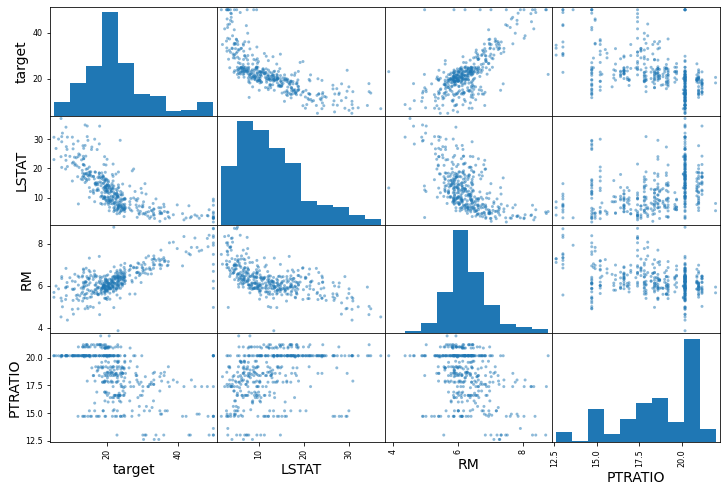

In [23]:
attributes = ['target', 'LSTAT', 'RM', 'PTRATIO']

scatter_matrix(vis_df[attributes], figsize=(12, 8))

- Pode-se observar o acumulo de pontos com o valor 50 na variável target, reforçando a possibilidade de um valor máximo, onde qualquer valor acima é colocado naquela clássificação

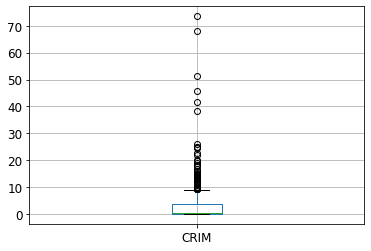

In [24]:
vis_df.boxplot(column = 'CRIM')

- Taxa de criminalidade per capita é em sua maioria baixa com alguns outliers
- Maioria das observações tem um valor próximo de zero, e mais de 75% tem menos de 10.
- Valor máximo: 88.9%
- Valor mínimo: 0.006%

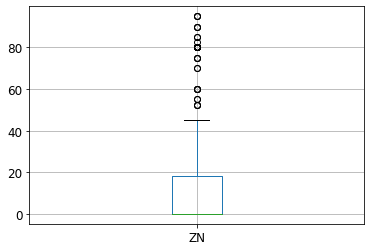

In [25]:
vis_df.boxplot(column = 'ZN')

- Sobre os terrenos residenciais zoneados tem-se uma distribuição próxima de zero, mas com uma quantidade expressiva maior que zero
- Valor máximo: 100%
- Valor mínimo: 0%

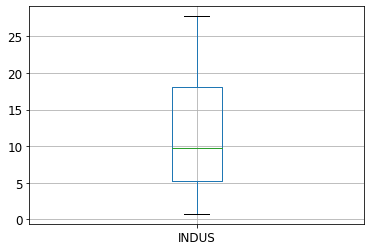

In [26]:
vis_df.boxplot(column = 'INDUS')

- Para a proporção de acres de negócios não varejistas observa-se que está bem distribuido, com mediana em 10.
- Valor máximo: 27.7
- Valor mínimo: 0.46

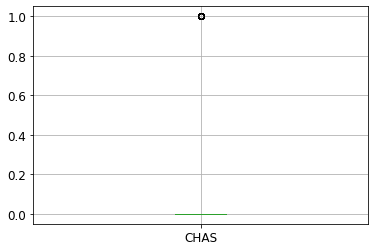

In [27]:
vis_df.boxplot(column = 'CHAS')

- Como já mencinoado é uma variável dummy que possui maioria significativa de 0, tendo alguns 1.

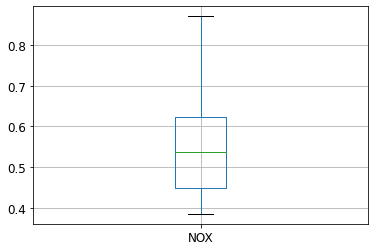

In [28]:
vis_df.boxplot(column = 'NOX')

- A concentração de óxidos nítricos aparenta estar bem distribuida, com mediana em 0.53.
- Valor máximo: 0.87
- Valor mínimo: 0.38

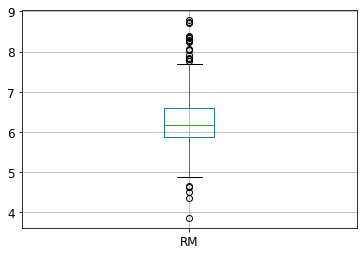

In [29]:
vis_df.boxplot(column = 'RM')

- Quanto ao número médio de quartos por habitação observa-se uma mediana de 6,2. Porém contém alguns outliers
- Valor máximo: 8.8
- Valor mínimo: 3.6

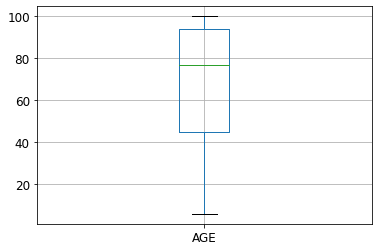

In [37]:
vis_df.boxplot(column = 'AGE')

- A proporção de unidades construidas antes de 1940 tem mediana de quase 80% tendo alguns casos com 100%.
- Valor máximo: 94%
- Valor mínimo: 2.9%

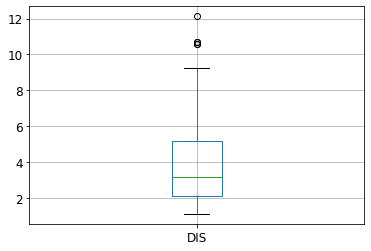

In [31]:
vis_df.boxplot(column = 'DIS')

- Distância ponderada com relação a centros de emprego possui mediana de 3, tendo alguns outliers
- Valor máximo: 12.1
- Valor mínimo: 1.1

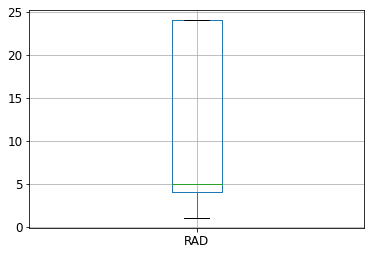

In [32]:
vis_df.boxplot(column = 'RAD')

- O índice de acessibilidade a rodovias possui mediana de 5 e valores maiores bem distribuidos.
- Valor máximo: 24
- Valor mínimo: 1

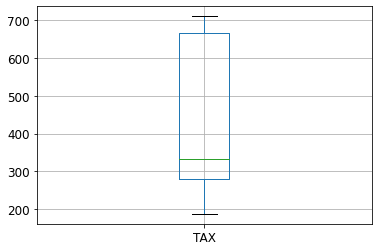

In [33]:
vis_df.boxplot(column = 'TAX')

- A taxa de impostos possui mediana de aproximadamente 330 e valores maiores bem distribuidos.
- Valor máximo: 711
- Valor mínimo: 187

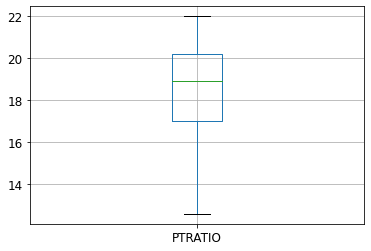

In [34]:
vis_df.boxplot(column = 'PTRATIO')

- A mediana da proporção de alunos por professor é de 19% sendo bem concentrada entre 12% e 22%
- Valor máximo: 22
- Valor mínimo: 12.6

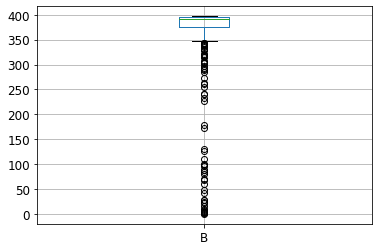

In [35]:
vis_df.boxplot(column = 'B')

- O valor de B, que se baseia na proporção de negros por cidade possui mediana próxima de 400, com seu máximo em 400 e diversos outliers até 0
- Valor máximo: 396.9
- Valor mínimo: 0.3

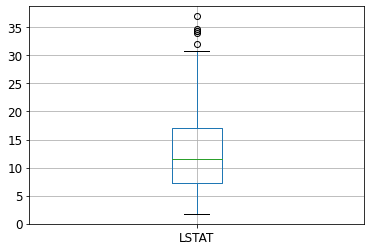

In [36]:
vis_df.boxplot(column = 'LSTAT')

- Quanto a porcentagem de status inferior da população a mediana é em torno de 12, com alguns outliers.
- Valor máximo: 38
- Valor mínimo: 1.7

# **4 - Preparação do conjunto de dados**

- Retirando rótulo do conjunto de treino:

In [38]:
treino = strat_train_set.drop('target', axis = 1)
treino_labels = strat_train_set['target'].copy()

- Como este conjunto de dados não possui observações com campos faltantes não é necessário aplicar um imputer para atribuir um valor ou excluir nenhuma observação.
- Também todas as colunas já estão na forma numérica, dispensando qualquer tratamento referentes a categorização de algum campo. Também dispensando a separação da pipeline em uma já numérica e uma das categóricas que seriam encodadas.
- Também não foi realizado nenhum processo de feature engineering, que caso houvesse seria necessário considerar na construção de uma pipeline de pré-processamento.
- Portanto único pré processamento necessário é fazer um *scale* dos dados.

In [76]:
atributos = list(treino)

pipeline = Pipeline([
        ('scaler', StandardScaler()),
    ])

treino_tratado = pipeline.fit_transform(treino)

In [40]:
treino_tratado

array([[ 1.24768736, -0.50212842,  1.01378578, ...,  0.7997827 ,
         0.44040912,  0.49559715],
       [-0.38984232, -0.50212842,  1.56884327, ...,  1.25429418,
         0.41968748, -0.02568565],
       [ 0.37787384, -0.50212842,  1.01378578, ...,  0.7997827 ,
        -2.89009389, -0.10492064],
       ...,
       [ 0.17558332, -0.50212842,  1.01378578, ...,  0.7997827 ,
         0.34370812, -0.18554571],
       [-0.41823428, -0.50212842, -0.38337741, ...,  1.11794073,
         0.42570344, -0.71099877],
       [-0.36543484,  0.36730213, -1.05559743, ..., -2.47269995,
         0.34537922, -0.76799235]])

In [41]:
treino_tratado.shape

(404, 13)

# **5 - Comparar ao menos 3 modelos de machine learning e algumas configuração de hiperparâmetros**

### Modelo 1 (Regressão Linear)

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(treino_tratado, treino_labels) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Métricas para avaliar o modelo:

In [43]:
# RMSE

treino_pred = lin_reg.predict(treino_tratado)
lin_mse = MSE(treino_labels, treino_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.683143531851959

In [44]:
# MAE

lin_mae = MAE(treino_labels, treino_pred)
lin_mae

3.2701246014379546

In [45]:
# Usando Cross Validation

scores = cross_val_score(lin_reg, treino_tratado, treino_labels,
                         scoring="neg_mean_squared_error", cv=10) 

lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [4.94615266 4.14352966 5.24167335 4.6270265  3.67130086 5.43609879
 5.09440372 3.65704483 5.58568454 5.72264864]
Mean: 4.812556355490777
Standard deviation: 0.7222130338201572


- Neste modelos podemos observar que a pontuação no conjunto de treino é levemente menor do que nos conjuntos de validação.

### Modelo 2 (Decision Tree)

In [46]:
decision_tree_reg = DecisionTreeRegressor(random_state= seed)
decision_tree_reg.fit(treino_tratado, treino_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1701, splitter='best')

- Métricas para avaliar o modelo:

In [47]:
# RMSE

treino_pred = decision_tree_reg.predict(treino_tratado)
decision_tree_mse = MSE(treino_labels, treino_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_rmse

0.0

In [48]:
# MAE

decision_tree_mae = MAE(treino_labels, treino_pred)
decision_tree_mae

0.0

In [49]:
# Usando Cross Validation

scores = cross_val_score(decision_tree_reg, treino_tratado, treino_labels,
                         scoring="neg_mean_squared_error", cv=10) 

decision_tree_rmse_scores = np.sqrt(-scores)

display_scores(decision_tree_rmse_scores)

Scores: [7.8309891  3.64427382 4.07592575 5.44592038 3.85431576 5.69519534
 3.33826302 3.04314804 4.15629041 4.30874112]
Mean: 4.539306275049141
Standard deviation: 1.3549567106151257


- Neste modelos podemos observar que a pontuação no conjunto de treino é significativamente menor do que nos conjuntos de validação, chegando a ser zero no conjunto de treino, o que indica um possível *overfit* (sobreajuste).

### Modelo 3 (Random Forest)

In [50]:
rf_reg = RandomForestRegressor(n_estimators=10, random_state=seed)
rf_reg.fit(treino_tratado, treino_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=1701, verbose=0, warm_start=False)

- Métricas para avaliar o modelo:

In [51]:
# RMSE

treino_pred = rf_reg.predict(treino_tratado)
rf_mse = MSE(treino_labels, treino_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

1.5447559806014541

In [52]:
# MAE

rf_mae = MAE(treino_labels, treino_pred)
rf_mae

1.0157673267326732

In [53]:
# Usando Cross Validation

scores = cross_val_score(rf_reg, treino_tratado, treino_labels,
                         scoring="neg_mean_squared_error", cv=10) 

rf_rmse_scores = np.sqrt(-scores)

display_scores(rf_rmse_scores)

Scores: [5.23035255 3.08432663 2.81267948 3.23499764 3.20829978 4.58328321
 3.05691675 2.76419835 3.14237331 3.35691376]
Mean: 3.447434145667601
Standard deviation: 0.7633215088802651


- Neste modelos podemos observar que a pontuação no conjunto de treino é significativamente menor do que nos conjuntos de validação, o que indica um possível *overfit* (sobreajuste).

### Ajuste no modelo

- Para lidar com o overfit pode-se seguir as seguintes soluções apresentadas no projeto *California Housing*: Simplificar o modelo, regularizar o modelo, ou obter mais dados. A obtenção de mais dados não é possível neste caso, e geralmente é muito custosa. A simplificação poderia ser um caminho, utilizando o modelo 1, de regressão linear, por exemplo. Porém pode-se tentar a ajustar os parametros do modelo, como será demonstrado a seguir.

In [70]:
param_grid = [

    {'n_estimators': [5, 50, 100], 'max_features': [4, 6, 8]},
  
    {'bootstrap': [False], 'n_estimators': [5, 10], 'max_features': [2, 3, 4]},
  ]

rf_reg = RandomForestRegressor(random_state=seed)

grid_search = GridSearchCV(rf_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(treino_tratado, treino_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1701,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

- Realizando um *GridSearch* como no caso do *California Housing*, e verificando os melhores parâmetros abaixo:

In [71]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [72]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1701, verbose=0, warm_start=False)

- Outra maneira de realizar o ajuste é utilizando o *RandomizedSearchCV*, que permite uma busca de hiperparâmetros com um grande número de combinações.

In [73]:
param_distribs = {
        'n_estimators': randint(low=1, high=300),
        'max_features': randint(low=1, high=10),
    }

rf_reg = RandomForestRegressor(random_state=seed)

rnd_search = RandomizedSearchCV(rf_reg,
                                param_distributions=param_distribs,
                                n_iter=10,
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=seed)

rnd_search.fit(treino_tratado, treino_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [74]:
cv_res = rnd_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

3.383240306983182 {'max_features': 5, 'n_estimators': 95}
3.4765488680458385 {'max_features': 4, 'n_estimators': 17}
3.378781456681188 {'max_features': 5, 'n_estimators': 291}
3.4155306029840755 {'max_features': 9, 'n_estimators': 227}
3.4414258362970234 {'max_features': 4, 'n_estimators': 68}
3.383997340740754 {'max_features': 7, 'n_estimators': 291}
3.596428024809922 {'max_features': 2, 'n_estimators': 214}
3.5963022125145208 {'max_features': 2, 'n_estimators': 221}
3.4753502004860617 {'max_features': 8, 'n_estimators': 100}
4.016567178084492 {'max_features': 1, 'n_estimators': 34}


- Observando as características mais importantes para o modelo:

In [77]:
feature_importances = grid_search.best_estimator_.feature_importances_

sorted(zip(feature_importances, atributos), reverse=True)

[(0.3676939791449859, 'LSTAT'),
 (0.28786769010982427, 'RM'),
 (0.06656059696793185, 'DIS'),
 (0.06312457641863779, 'CRIM'),
 (0.05424347137642899, 'NOX'),
 (0.05245938352245017, 'INDUS'),
 (0.04304706748400196, 'PTRATIO'),
 (0.023376415861906072, 'AGE'),
 (0.01613493764453182, 'B'),
 (0.01320400605287486, 'TAX'),
 (0.007192018983078954, 'RAD'),
 (0.003575854256398259, 'CHAS'),
 (0.0015200021769492431, 'ZN')]

- Podemos observar que as características mais relevantes são LSTAT, que é a porcentagem de status inferior da população, e em seguida RM, que é o número médio de quartos por habitação.

# **6 - Fazer teste final para obter um erro aproximado**

- Realizando teste final no modelo selecionado e ajustado:

In [79]:
model = rnd_search.best_estimator_

X_test = strat_test_set.drop('target', axis=1)
y_test = strat_test_set['target'].copy()

X_test_tratado = pipeline.transform(X_test)

predictions = model.predict(X_test_tratado)

final_mse = MSE(y_test, predictions)
final_rmse = np.sqrt(final_mse)

In [80]:
final_rmse

2.9377420744172222

- Onde podemos notar uma melhora de desempenho.